### Using Data to Improve MLB Attendance

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [2]:
#loading the data into a dataframe
df = pd.read_csv("dodgers_2022.csv")

In [3]:
#inspecting the data
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
#checking the shape of the dataframe
df.shape

(81, 12)

In [5]:
#inspecting the attributes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [6]:
#checking for null values
df.isna().sum().sum()

0

Looking at the dataset with respect to increasing the attendance for the games, the attributes given makes sense to me. However, as a sports fan myself, one information I would have collected is the record of the opponent or the ranking of the opponent. When I try to watch a game live, the quality of the opponent is definitely something I would look at as well.

In [7]:
#Checking for attendance statistics
df.attend.describe().T

count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64

There is quite a wide spread of attendance numbers over the 81 games played that season. It'll be interesting to check if there are any commonalities for the highest attended games.

In [8]:
#checking the most attended games using 75% of the highest attendance as a query parameter
df.query('attend >= 46588')

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES
11,APR,29,48753,Sunday,Nationals,74,Clear,Day,NO,YES,NO,NO
17,MAY,13,49124,Sunday,Rockies,70,Clear,Day,NO,NO,NO,NO
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,NO,NO,NO,YES
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,NO,NO,NO,NO
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,NO,NO,NO,YES


From this query, no pattern really stands out right away in terms of day of the week and opponent. In terms of temperature, there is quite a wide range. In terms of skies and if the game was played during day or night, a lot more of these games were played with clear skies and during night time. Lastly, most games had promotions,however, the type of promotions were mixed.

Assumption: I know that weather and day of the week are big considerations for one to attend a game especially that baseball is an outdoor game. However, I know that for professional leagues, the league itself schedules the games and so the teams do not really have the ability to pick when to play the game. With that being said, I will not include the day when the game was played in addition to the weather (temp and skies) for my recommendations as these attributes can be considered as out of the team's control. I will focus on the promotions and will recommend which promotions to provide especially during lower attendance games.

In [9]:
#Continuing from my assumption above, I would like to determine which promotion drives the highest attendance average.
dodge_promo = df.groupby(['cap', 'shirt', 'fireworks', 'bobblehead']).attend.mean().sort_values\
(ascending=False)
dodge_promo

cap  shirt  fireworks  bobblehead
NO   NO     NO         YES           53144.636364
     YES    NO         NO            46643.666667
     NO     YES        NO            41077.857143
            NO         NO            38201.078431
YES  NO     NO         NO            38189.500000
Name: attend, dtype: float64

Text(0, 0.5, 'Average Attendance')

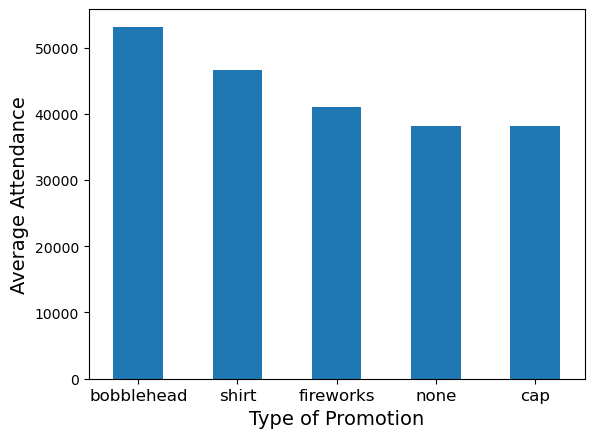

In [10]:
#plotting average attendace vs promotion type
promo_plot = dodge_promo.plot.bar()
promo_plot.set_xticklabels(['bobblehead','shirt','fireworks', 'none', 'cap'], rotation = 0, fontsize=12)
promo_plot.set_xlabel('Type of Promotion', fontsize=14)
promo_plot.set_ylabel('Average Attendance', fontsize=14)

Based on the results above, I will recommend promotions for games in the order of what is shown in the plot. Games with bobblehead, shirt and fireworks have higher average attendance compared to games without promotion or with a cap giveaway. The average attendance for games without a promotion and with a cap giveaway are similar so the cap giveaway did not increase the attendance of the games. I would recommend to change this promotion to either of the bobblehead, shirt or fireworks, or even possibly experiment with a new promotion type. The question is when should they have a promotion? The next plot shows the average attendance per day of the week.

In [11]:
#groupint average attendance based on the day of the week
game_day = df.groupby(df.day_of_week).attend.mean().sort_values\
(ascending=False)
game_day

day_of_week
Tuesday      47741.230769
Saturday     43072.923077
Sunday       42268.846154
Thursday     40407.400000
Friday       40116.923077
Wednesday    37585.166667
Monday       34965.666667
Name: attend, dtype: float64

Text(0, 0.5, 'Average Attendance')

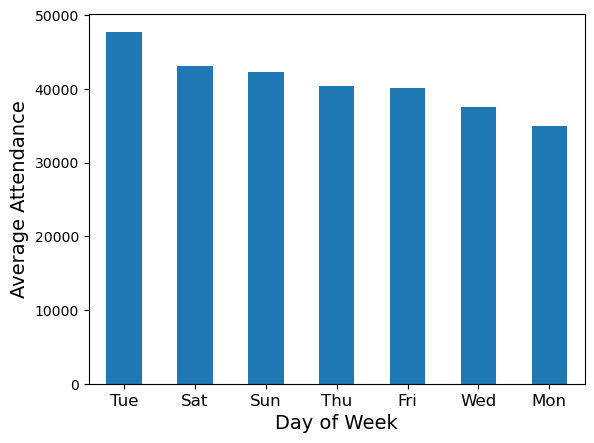

In [12]:
#Plotting average attendance vs days of the week
game_day_plot = game_day.plot.bar()
game_day_plot.set_xticklabels(['Tue', 'Sat', 'Sun', 'Thu', 'Fri', 'Wed', 'Mon'], rotation = 0, fontsize=12)
game_day_plot.set_xlabel('Day of Week', fontsize=14)
game_day_plot.set_ylabel('Average Attendance', fontsize=14)

Based on the plot above, Tuesday and the weekends showed highest average attendance. The weekends are almost a given since most people are off on the weekends and have time to watch the games. Tuesday is counterintuitive to me as it is going towards the mid of the week so I wasn't expecting this result. The two lowest attendance days definitely makes sense to me as Monday is the start of the workweek while Wednesday is in the middle of the workweek. So I would definitely recommend promotions during these days.

In [13]:
#My analysis ends above but I am still curious why Tuesday had the highest average attendance 
#so I do a simple query below.
df_tue = df[df['day_of_week'] == 'Tuesday']

In [14]:
df_tue.shape

(13, 12)

In [15]:
#determining if how many games had promotions vs not on a Tuesday
df_tue[(df_tue.cap == 'YES') | (df_tue.shirt == 'YES') | (df_tue.fireworks == 'YES') |\
       (df_tue.bobblehead == 'YES')].shape

(8, 12)

Out of 13 games that took place on a Tuesday, 8 of them had promotions compared to 5 without. Although it is clear that promotions drive attendance, there isn't enough data to conclude that this is the reason why Tuesday games had the highest average of attendance based on whether there was a promotion or not. This is perhaps a trend that can be investigated. Doing a quick search online, it states that Friday to Sunday have the highest attendance overall for MLB games.

Since I am still skeptical that Tuesdays have the highest average attendance, I decided to double check if the day of the week from the dataset corresponds to the date. Based on the filename of dodgers_2022.csv, if the season is for 2022, it turns out that the day of the week in the dataset is incorrect. So I now have to correct the day of the week in the dataset. This is a reminder that I should have checked it earlier.

In [16]:
#creating the year column for the dataset
df['year'] = '2022'

In [17]:
#creating a function to convert month to number
def monthToNum(month):
    if month == 'JAN':
        return 1
    elif month == 'FEB':
        return 2
    elif month == 'MAR':
        return 3
    elif month == 'APR':
        return 4
    elif month == 'MAY':
        return 5
    elif month == 'JUN':
        return 6
    elif month == 'JUL':
        return 7
    elif month == 'AUG':
        return 8
    elif month == 'SEP':
        return 9
    elif month == 'OCT':
        return 10
    elif month == 'NOV':
        return 11
    elif month == 'DEC':
        return 12
            

In [18]:
#converting the three letter month abbreviation using the function I created above
df['month'] = df['month'].apply(monthToNum)

In [19]:
#creating the datetime
dt_series = pd.to_datetime(df[['year', 'month', 'day']])
df['datetime'] = dt_series

In [20]:
#creating a function to determine the day of week from the datetime column
def day_name(datetime):
    return datetime.strftime('%A')

In [21]:
#correcting the day of week
df['day_of_week'] = df['datetime'].apply(day_name)

After correcting the day of the week, the analysis regarding which promotion drives more attendance is still valid as day of the week was not used to predict those results. However, the analysis regarding attendance vs day of the week needs to be repeated.

In [22]:
#grouping average attendance based on the day of the week
game_day_corrected = df.groupby(df.day_of_week).attend.mean().sort_values\
(ascending=False)
game_day_corrected

day_of_week
Sunday       47741.230769
Thursday     43072.923077
Friday       42268.846154
Tuesday      40407.400000
Wednesday    40116.923077
Monday       37585.166667
Saturday     34965.666667
Name: attend, dtype: float64

Text(0, 0.5, 'Average Attendance')

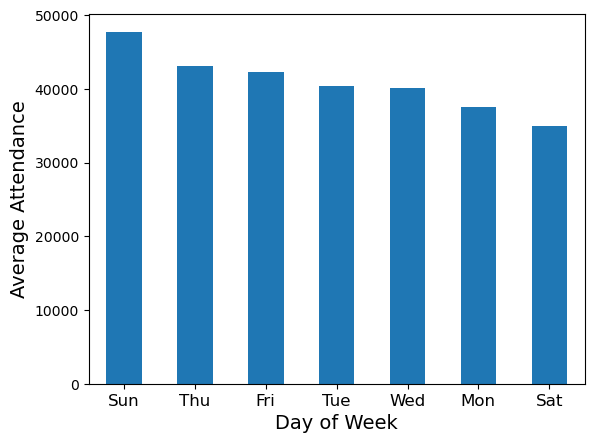

In [23]:
#Plotting average attendance vs days of the week
game_day_corrected_plot = game_day_corrected.plot.bar()
game_day_corrected_plot.set_xticklabels(['Sun', 'Thu', 'Fri', 'Tue', 'Wed', 'Mon', 'Sat'], rotation = 0, fontsize=12)
game_day_corrected_plot.set_xlabel('Day of Week', fontsize=14)
game_day_corrected_plot.set_ylabel('Average Attendance', fontsize=14)

The results above makes more sense to me that Sunday had the highest average attendance and games towards the weekend had higher attendance rates than weekdays. The only exception is Saturday. Perhaps with more data, more insights can be drawn why this is the case. But the answer to providing a recommendation to increase attendance, it would still be having promotions for the game.